In [43]:
import numpy as np
import matplotlib.pyplot as pl
import matplotlib as mpl
import pandas as pd
import sys
sys.path.append("../")
import gyrochrones as gyr

pl.rc('xtick', labelsize=20)
pl.rc('ytick', labelsize=20)
pl.rc('axes', labelsize=25)
pl.rc('axes', titlesize=30)
pl.rc('legend', handlelength=3)
pl.rc('legend', fontsize=20)

%matplotlib inline

In [44]:
df = pd.read_hdf('data/good.h5')

In [45]:
xcoord = df['galcen_x'] + 8300
ycoord = df['galcen_y']
angle = np.arctan(ycoord/xcoord)*180/np.pi

theta = np.array([10, 20, 30, 40, 50, 60, 70, 80])

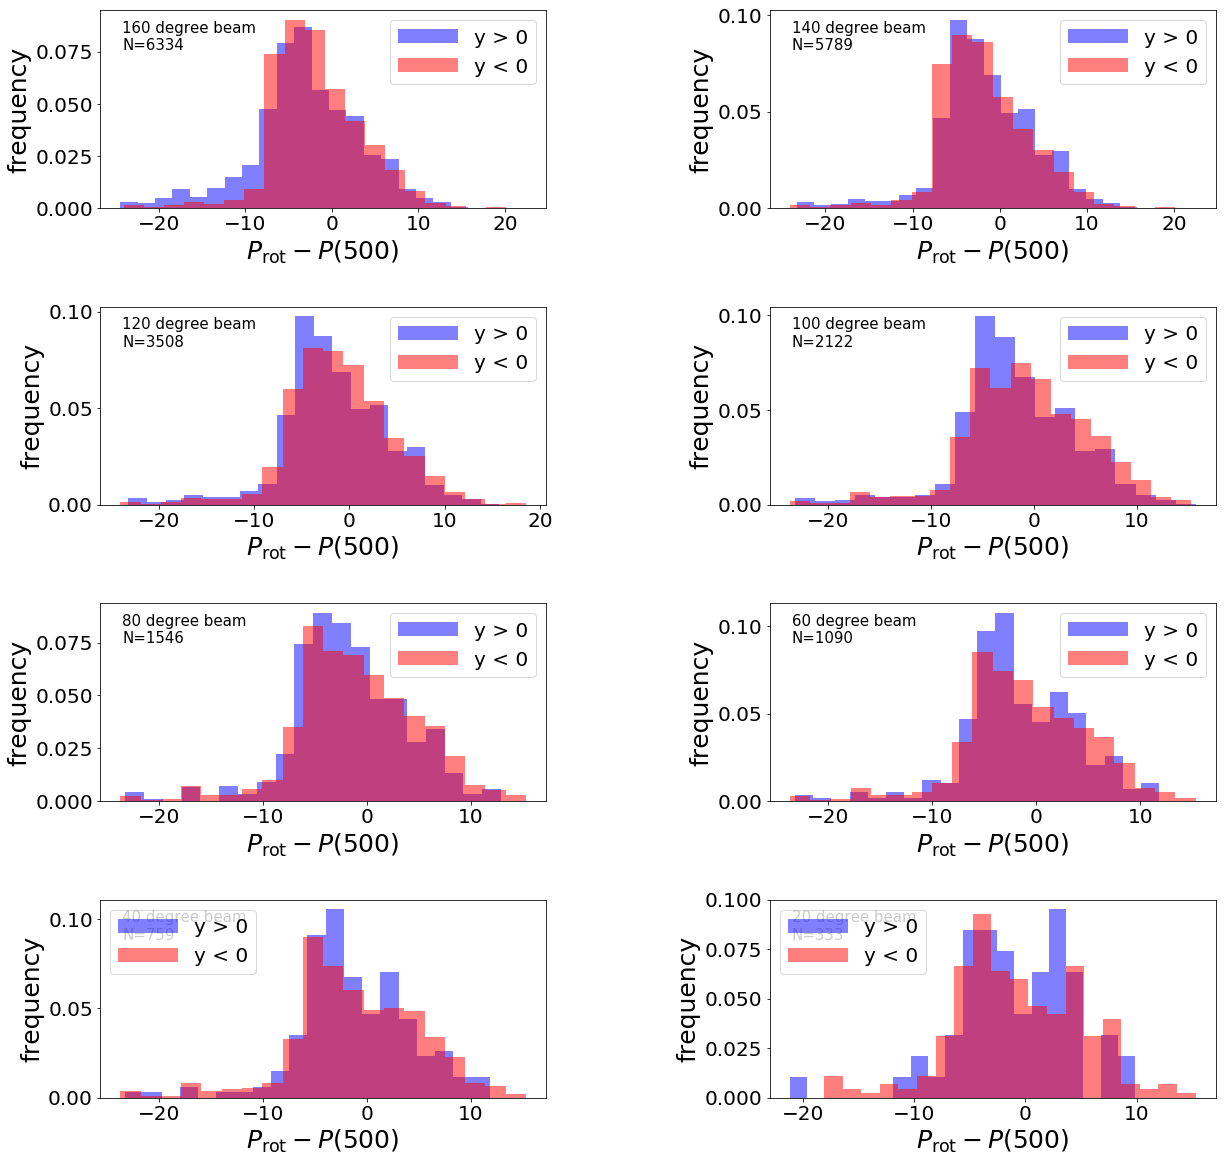

In [58]:
gyrochrone = gyr.MM09e3(df['B_V'], 600)
finite_age_mask = np.isfinite(gyrochrone)
fig, axs = pl.subplots(4, 2, figsize=(20, 20))
pl.subplots_adjust(wspace=0.5, hspace=0.5)
axs = np.concatenate(axs)
for i in range(len(theta)): 
    forward = (np.abs(angle) > theta[i]) & (ycoord > 0)
    backward = (np.abs(angle) > theta[i]) & (ycoord < 0)
    perdiff = np.exp(df['logperiod_mean'][finite_age_mask]) - gyrochrone[finite_age_mask]
    axs[i].annotate("{0} degree beam\nN={1}".format(180-2*theta[i], np.sum(forward)+np.sum(backward)), 
                    xy=(0.05, 0.8), xycoords='axes fraction', fontsize=15)
    axs[i].hist(perdiff[forward], color='b', density=True, bins=20, alpha=0.5, label="y > 0")
    axs[i].hist(perdiff[backward], color='r', density=True, bins=20, alpha=0.5, label="y < 0")
    axs[i].legend()
    axs[i].set_xlabel(r'$P_\mathrm{rot} - P(500)$')
    axs[i].set_ylabel('frequency')

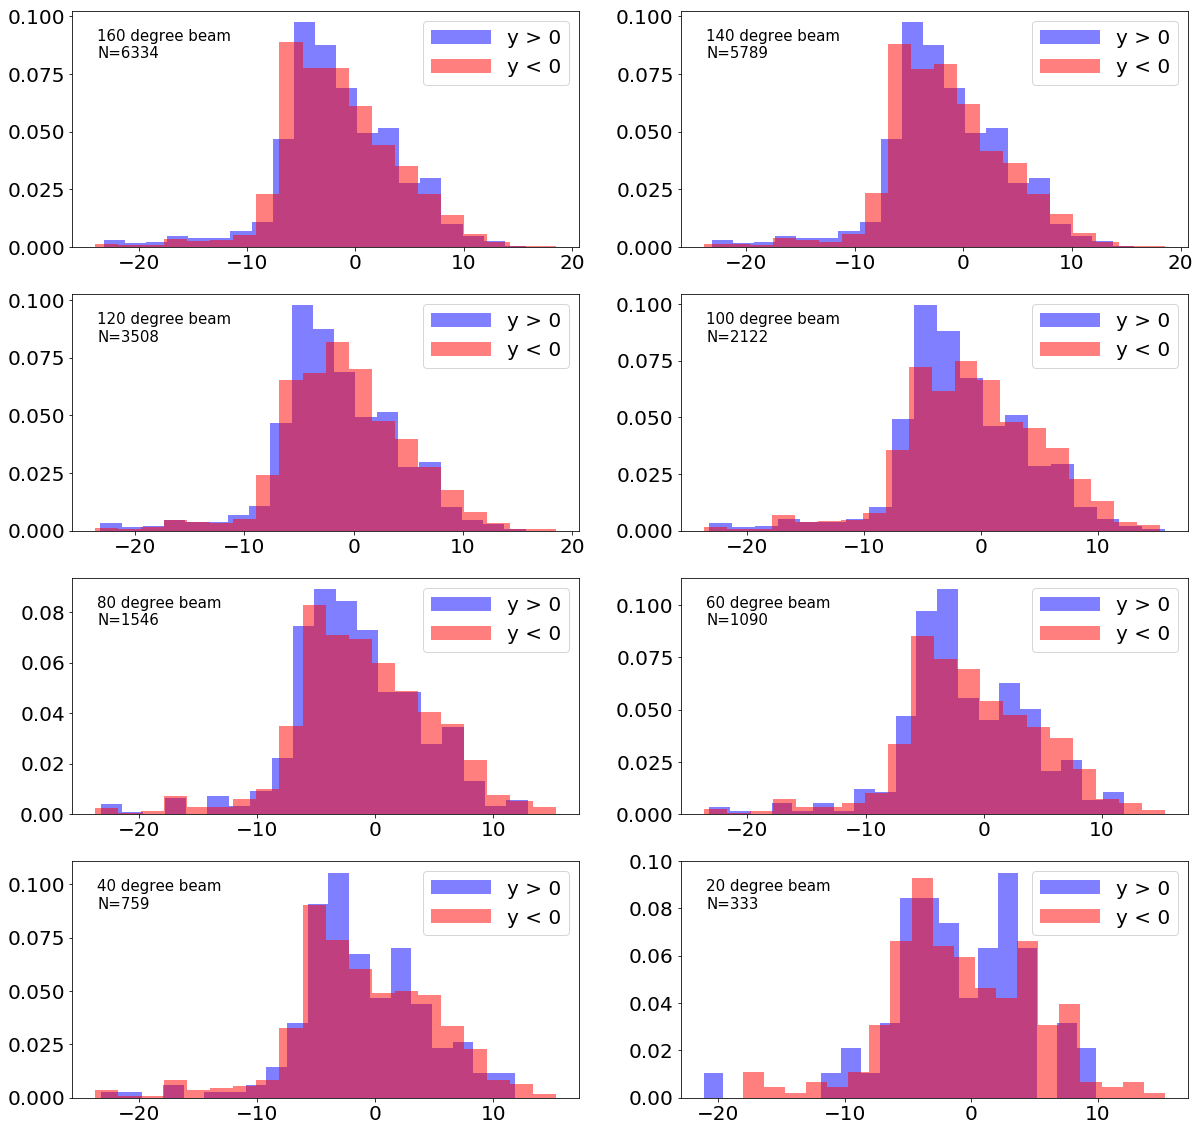

In [50]:
gyrochrone = gyr.MM09e3(df['B_V'], 600)
finite_age_mask = np.isfinite(gyrochrone)
noclusters = (df['k2_campaign_str'] != b'16') & (df['k2_campaign_str'] != b'5') & (df['k2_campaign_str'] != b'4')
fig, axs = pl.subplots(4, 2, figsize=(20, 20))
axs = np.concatenate(axs)
for i in range(len(theta)): 
    forward = (np.abs(angle) > theta[i]) & (ycoord > 0)
    backward = (np.abs(angle) > theta[i]) & (ycoord < 0)
    perdiff = np.exp(df['logperiod_mean'][finite_age_mask][noclusters]) - gyrochrone[finite_age_mask][noclusters]
    axs[i].annotate("{0} degree beam\nN={1}".format(180-2*theta[i], np.sum(forward)+np.sum(backward)), 
                    xy=(0.05, 0.8), xycoords='axes fraction', fontsize=15)
    axs[i].hist(perdiff[forward], color='b', density=True, bins=20, alpha=0.5, label="y > 0")
    axs[i].hist(perdiff[backward], color='r', density=True, bins=20, alpha=0.5, label="y < 0")
    axs[i].legend()

In [48]:
for k in df.keys():
    print(k)

solution_id
designation
source_id
random_index
gaia_ref_epoch
ra
ra_error
dec
dec_error
parallax
parallax_error
parallax_over_error
pmra
pmra_error
pmdec
pmdec_error
ra_dec_corr
ra_parallax_corr
ra_pmra_corr
ra_pmdec_corr
dec_parallax_corr
dec_pmra_corr
dec_pmdec_corr
parallax_pmra_corr
parallax_pmdec_corr
pmra_pmdec_corr
astrometric_n_obs_al
astrometric_n_obs_ac
astrometric_n_good_obs_al
astrometric_n_bad_obs_al
astrometric_gof_al
astrometric_chi2_al
astrometric_excess_noise
astrometric_excess_noise_sig
astrometric_params_solved
astrometric_primary_flag
astrometric_weight_al
astrometric_pseudo_colour
astrometric_pseudo_colour_error
mean_varpi_factor_al
astrometric_matched_observations
visibility_periods_used
astrometric_sigma5d_max
frame_rotator_object_type
matched_observations
duplicated_source
phot_g_n_obs
phot_g_mean_flux
phot_g_mean_flux_error
phot_g_mean_flux_over_error
phot_g_mean_mag
phot_bp_n_obs
phot_bp_mean_flux
phot_bp_mean_flux_error
phot_bp_mean_flux_over_error
phot_bp_me